In [1]:
from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.model.galaxy import galaxy
from autolens.lens import ray_tracing
from autolens.data.array import grids
from autolens.lens.plotters import plane_plotters
from autolens.lens.plotters import ray_tracing_plotters

# In this example, we'll use the 'ray-tracing' module, to setup the same lens-plane + source-plane strong 
# lens configuration as the previous tutorial, but with a lot less lines of code!

In [2]:
# Let use the same grid-stack we've all grown to know and love by now!
image_plane_grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(shape=(100, 100), pixel_scale=0.05,
                                                                                  sub_grid_size=2)

In [3]:
# For our lens galaxy, we'll use the same SIS mass profile as before.
sis_mass_profile = mass_profiles.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)
lens_galaxy = galaxy.Galaxy(mass=sis_mass_profile)
print(lens_galaxy)

Redshift: None
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


In [4]:
# And for our source galaxy, the same Sersic light profile
sersic_light_profile = light_profiles.SphericalSersic(centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, 
                                                      sersic_index=1.0)
source_galaxy = galaxy.Galaxy(light=sersic_light_profile)
print(source_galaxy)

Redshift: None
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0


In [5]:
# Now, lets use the lens and source galaxies to ray-trace our grid-stack, using a 'tracer' from the ray-tracing 
# module. When we pass our galaxies and grid-stack into the Tracer below, the following happens:

# 1) Using the lens-galaxy's mass-profile, the deflection angle of every image-plane grid coordinate is computed.
# 2) These deflection angles are used to trace every image-plane coordinate to a source-plane coordinate.
# 3) This creates the source-plane grid-stack of lensed coordinates.

tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                             image_plane_grid_stack=image_plane_grid_stack)

In [6]:
# The tracer is composed of an image-plane and source-plane, just like in the previous example!
print('Regular-grid image-plane coordinate 1')
print(tracer.image_plane.grid_stack.regular[0])
print('Regular-grid image-plane coordinate 2')
print(tracer.image_plane.grid_stack.regular[1])
print('Regular-grid image-plane coordinate 3')
print(tracer.image_plane.grid_stack.regular[2])

# And the source-plane's grid has been deflected.
print('Regular-grid source-plane coordinate 1')
print(tracer.source_plane.grid_stack.regular[0])
print('Regular-grid source-plane coordinate 2')
print(tracer.source_plane.grid_stack.regular[1])
print('Regular-grid source-plane coordinate 3')
print(tracer.source_plane.grid_stack.regular[2])

Regular-grid image-plane coordinate 1
[ 2.475 -2.475]
Regular-grid image-plane coordinate 2
[ 2.475 -2.425]
Regular-grid image-plane coordinate 3
[ 2.475 -2.375]
Regular-grid source-plane coordinate 1
[ 1.34362915 -1.34362915]
Regular-grid source-plane coordinate 2
[ 1.33214405 -1.30523205]
Regular-grid source-plane coordinate 3
[ 1.32054728 -1.26719184]


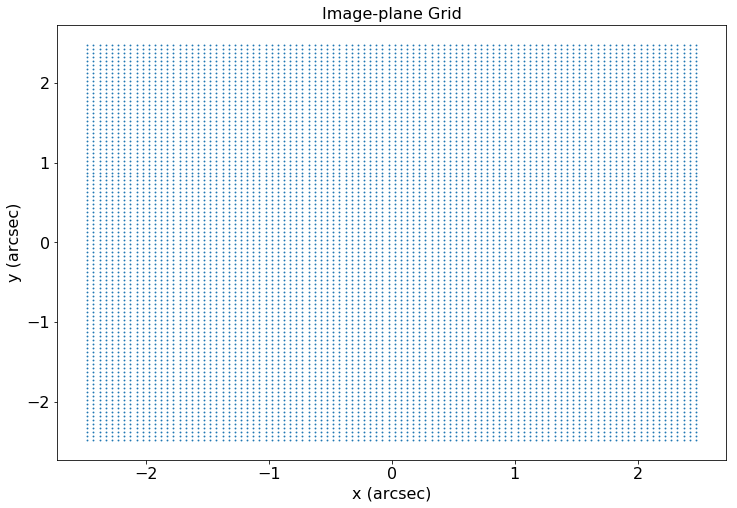

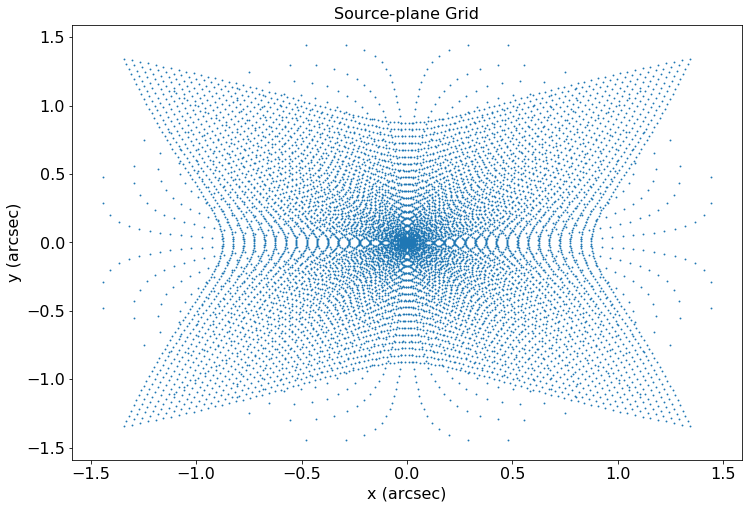

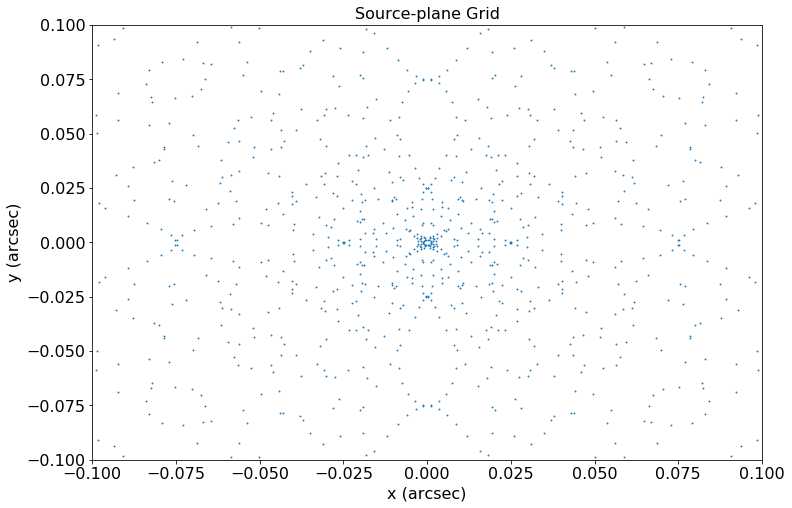

In [7]:
# We can use the plane_plotter to plot these grids, like we did before.
plane_plotters.plot_plane_grid(plane=tracer.image_plane, title='Image-plane Grid')
plane_plotters.plot_plane_grid(plane=tracer.source_plane, title='Source-plane Grid')
plane_plotters.plot_plane_grid(plane=tracer.source_plane, axis_limits=[-0.1, 0.1, -0.1, 0.1], title='Source-plane Grid')

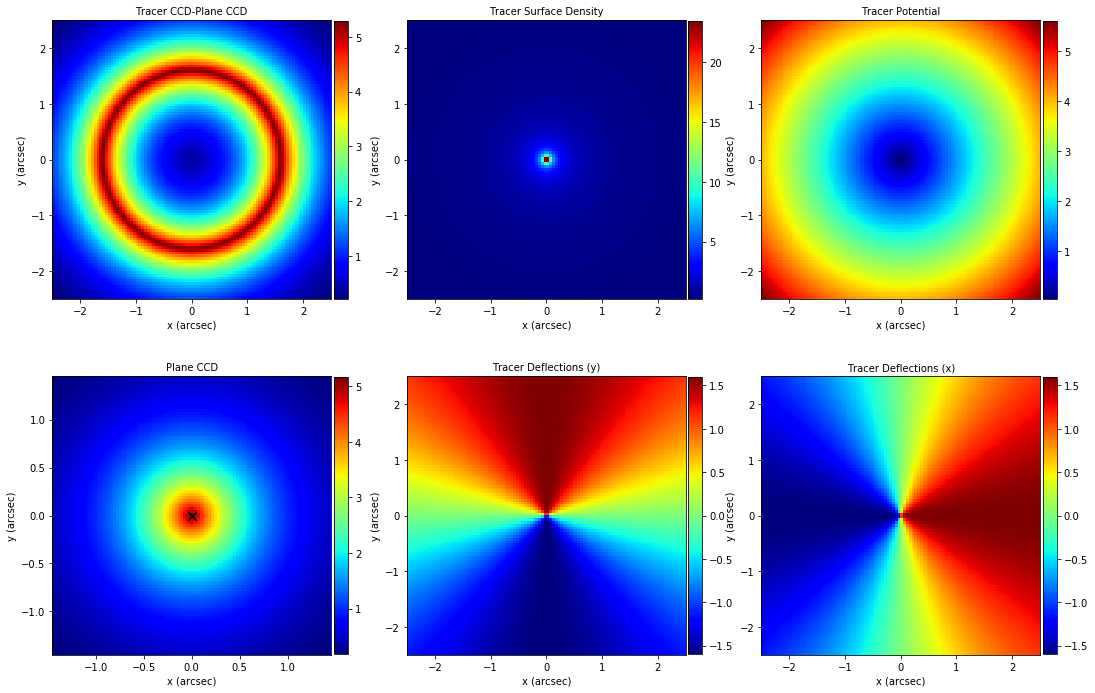

In [8]:
# PyAutoLens has tools for plotting a tracer. A ray-tracing subplot plots the following:

# 1) The image-plane image, computed by tracing the source galaxy's light 'forwards' through the tracer.
# 2) The source-plane image, showing the source galaxy's true appearance (i.e. if it were not lensed).
# 3) The image-plane surface density, computed using the lens galaxy's mass profile.
# 4) The image-plane gravitational potential, computed using the lens galaxy's mass profile.
# 5) The image-plane deflection angles, computed using the lens galaxy's mass profile.

ray_tracing_plotters.plot_ray_tracing_subplot(tracer=tracer)

In [9]:
# Just like for a plane, these attributes can be accessed by print statements (converted to 2D NumPy 
# arrays the same dimensions as our input grid-stack!).
print('Tracer - Surface Density - Regular-grid coordinate 1:')
print(tracer.surface_density[0,0])
print('Tracer - Surface Density - Regular-grid coordinate 2:')
print(tracer.surface_density[0,1])
print('Tracer - Surface Density - Regular-grid coordinate 3:')
print(tracer.surface_density[0,2])
print('Tracer - Surface Density - Regular-grid coordinate 101:')
print(tracer.surface_density[1,0])

Tracer - Surface Density - Regular-grid coordinate 1:
0.22856041545549954
Tracer - Surface Density - Regular-grid coordinate 2:
0.23088065823405146
Tracer - Surface Density - Regular-grid coordinate 3:
0.2332234593146764
Tracer - Surface Density - Regular-grid coordinate 101:
0.23088065823405146


In [10]:

# Of course, these surface densities are identical to the image-plane surface densities, as it's only the lens galaxy
# that contributes to the overall mass of the ray-tracing system.
print('Image-Plane - Surface Density - Regular-grid coordinate 1:')
print(tracer.image_plane.surface_density[0,0])
print('Image-Plane - Surface Density - Regular-grid coordinate 2:')
print(tracer.image_plane.surface_density[0,1])
print('Image-Plane - Surface Density - Regular-grid coordinate 3:')
print(tracer.image_plane.surface_density[0,2])
print('Image-Plane - Surface Density - Regular-grid coordinate 101:')
print(tracer.image_plane.surface_density[1,0])


Image-Plane - Surface Density - Regular-grid coordinate 1:
0.22856041545549954
Image-Plane - Surface Density - Regular-grid coordinate 2:
0.23088065823405146
Image-Plane - Surface Density - Regular-grid coordinate 3:


0.2332234593146764
Image-Plane - Surface Density - Regular-grid coordinate 101:
0.23088065823405146


In [12]:
# I've left the rest below commented to avoid too many print statements, but if you're feeling adventurous go ahead
# and uncomment the lines below!
# print('Potential:')
# print(tracer.potential)
# print(tracer.image_plane.potential)
# print('Deflections:')
# print(tracer.deflections_x)
# print(tracer.deflections_y)
# print(tracer.image_plane.deflections_x)
# print(tracer.image_plane.deflections_y)
# print('Image-plane Image:')
# print(tracer.image_plane_image)
# print(tracer.image_plane.image_plane_image)
# print('Source-plane Image:')
# print(tracer.source_plane_image)
# print(tracer.image_plane.source_plane_image)

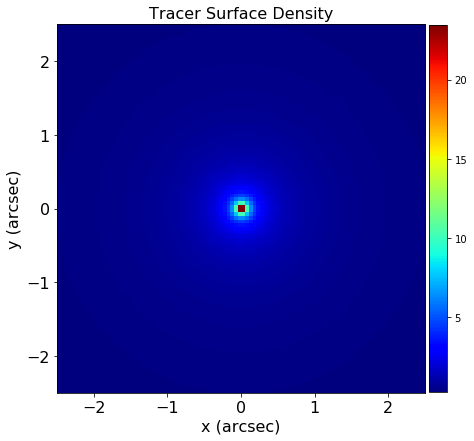

In [13]:
# You can also plot the above attributes on individual figures, using appropriate ray-tracing plotter (I've left most
# commented out again for convinience)
ray_tracing_plotters.plot_surface_density(tracer=tracer)
# ray_tracing_plotters.plot_potential(tracer=tracer)
# ray_tracing_plotters.plot_deflections_y(tracer=tracer)
#ray_tracing_plotters.plot_deflections_x(tracer=tracer)
# ray_tracing_plotters.plot_image_plane_image(tracer=tracer)

In [14]:
# Before we finish, you might be wondering 'why do both the image-plane and tracer have the attributes surface density 
# / potential / deflection angles, when the two are identical'. Afterall, only mass profiles contribute to these quantities, 
# and only the image-plane has galaxies with measureable  mass profiles! There are two reasons:

# 1) Convinience - You could always write 'tracer.image_plane.surface_density' and  
#                  'plane_plotters.surface_density(plane=tracer.image_plane). However, code appears neater if you can
#                  just write 'tracer.surface_density' and 'ray_tracing_plotters.plot_surface_density(tracer=tracer).

# 2) Multi-plane lensing - For now, we're focused on the simplest lensing configuratio possible, an image-plane + source-plane 
#                          configuration. However, there are strong lens system where there are more than 2 planes! In these 
#                          instances, the  surface density, potential and deflections of each plane is different to the overall
#                          values given by the tracer. 
                          
#                          This is beyond the scope of this chapter, but be reassured that what you're learning now
#                          will prepare you for the advanced chapters later on!

In [15]:
# And with that, we're done. You've performed your first ray-tracing with PyAutoLens! There are
# no exercises for this chapter, and we're going to take a deeper look at ray-tracing in the next
# chapter.